<a href="https://colab.research.google.com/github/DivyanshKs/Data-Analysis-with-Pandas-and-Python/blob/master/Machine%20Learning%20YouTube%20Adview%20Prediction%20Porject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

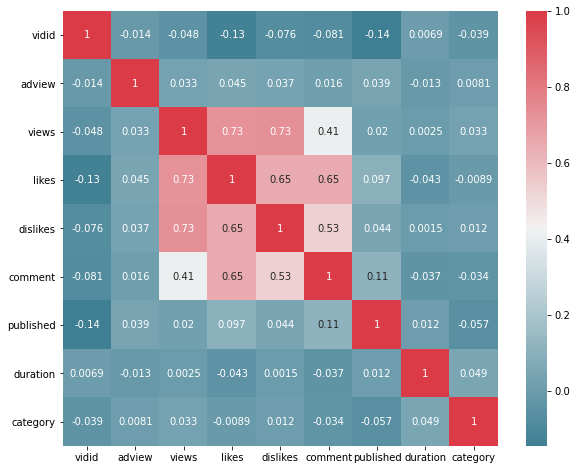

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm 
import matplotlib.pyplot as plt

path= "/content/train.csv"
data_train = pd.read_csv(path)
data_train.head()
data_train.shape

category={'A':1,'B':2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

data_train=data_train[data_train.views!="F"]
data_train=data_train[data_train.likes!="F"]
data_train=data_train[data_train.dislikes!="F"]
data_train=data_train[data_train.comment!="F"]

data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train["vidid"]

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()


import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr= data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()


In [2]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ["target"])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

from sklearn import metrics
def print_error(X_test,y_test,model_name):
  prediction=model_name.predict(X_test)
  print("Mean Absolute Error:-", metrics.mean_absolute_error(y_test,prediction))
  print("Mean Squared Error:-", metrics.mean_squared_error(y_test,prediction))
  print("Root Mean Squared Error:-", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_sample_lcaf=2
random_forest=RandomForestRegressor(n_estimators= n_estimators,max_depth=max_depth,min_samples_split=min_sample_lcaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

import keras
from keras.layers import Dense
ann= keras.models.Sequential([
                              Dense(6,activation='relu',
                              input_shape=X_train.shape[1:]),
                              Dense(6,activation='relu'),
                              Dense(1)
                              ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

ann.save("ann_youtubeadview.h5")

Mean Absolute Error:- 5288.059212091739
Mean Squared Error:- 10881114821.641329
Root Mean Squared Error:- 104312.58227865577
Mean Absolute Error:- 5475.207650273224
Mean Squared Error:- 12351823355.349043
Root Mean Squared Error:- 111138.75721524442


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:- 5288.059212091739
Mean Squared Error:- 10881114821.641329
Root Mean Squared Error:- 104312.58227865577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error:- 5202.80000321831
Mean Squared Error:- 10273526909.415396
Root Mean Squared Error:- 101358.40818311718
Epoch 1/100
366/366 [==============================] - 14s 1ms/step - loss: 591854134.7466 - mean_squared_error: 591854134.7466
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 1626481797.4932 - mean_squared_error: 1626481797.4932
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 691624019.3243 - mean_squared_error: 691624019.3243
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 323442615.2234 - mean_squared_error: 323442615.2234
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 1126220743.5150 - mean_squared_error: 1126220743.5150
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 567061616.7457 - mean_squared_error: 567061616.7457
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 848736519.1995 - mean_squared_erro

In [3]:
path= "/content/test.csv" 
data_test = pd.read_csv(path)
data_test.head()
data_test.shape

category={'A':1,'B':2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

data_test=data_test[data_test.views!="F"]
data_test=data_test[data_test.likes!="F"]
data_test=data_test[data_test.dislikes!="F"]
data_test=data_test[data_test.comment!="F"]

data_test["views"]=pd.to_numeric(data_test["views"])
data_test["comment"]=pd.to_numeric(data_test["comment"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])

column_vidid=data_test["vidid"]

from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

test=pd.read_csv("test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
X_test

from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_sample_lcaf=2
random_forest=RandomForestRegressor(n_estimators= n_estimators,max_depth=max_depth,min_samples_split=min_sample_lcaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)


model = RandomForestRegressor()
model.fit(X_train,y_train)
RandomForestRegressor()
y_pred = model.predict(X_test)
y_pred

import numpy as np
import pandas as pd
y_pred = pd.DataFrame(y_pred, columns=['y_pred']).to_csv('Predictions_Final_Submission_File.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error:- 4698.0936858200075
Mean Squared Error:- 10265217068.708435
Root Mean Squared Error:- 101317.40753053463


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
